In [43]:
!pip install kaggle

In [44]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [131]:
!kaggle competitions download -c titanic
!kaggle datasets download -d redwankarimsony/heart-disease-data

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
403 - Forbidden - Permission 'datasets.get' was denied


In [46]:
! unzip heart-disease-data.zip -d data

Archive:  heart-disease-data.zip
replace data/heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [404]:
# data/load_data.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings(action="ignore")

def load_data(filepath):
    # Load dataset into pandas dataframe
    df = pd.read_csv(filepath)

    # Handle missing values (if any)
    df.fillna(method='ffill', inplace=True)
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Convert categorical variables to numerical using LabelEncoder
    label_encoder = LabelEncoder()

    df['sex'] = label_encoder.fit_transform(df['sex']) # Convert 'sex' column to numerical labels
    df['cp'] = label_encoder.fit_transform(df['cp']) # Convert 'cp' column to numerical labels
    df['fbs'] = label_encoder.fit_transform(df['fbs']) # Convert 'fbs' column to numerical labels
    df['restecg'] = label_encoder.fit_transform(df['restecg']) # Convert 'restecg' column to numerical labels
    df['exang'] = label_encoder.fit_transform(df['exang']) # Convert 'exang' column to numerical labels
    df['slope'] = label_encoder.fit_transform(df['slope']) # Convert 'slope' column to numerical labels
    df['ca'] = label_encoder.fit_transform(df['ca']) # Convert 'ca' column to numerical labels
    df['thal'] = label_encoder.fit_transform(df['thal']) # Convert 'thal' column to numerical labels
    df['dataset'] = label_encoder.fit_transform(df['dataset']) # Convert 'target' column to numerical labels
    df['num'] = label_encoder.fit_transform(df['num']) # Convert 'target' column to numerical labels


    return df

def split_data(df, target_column='sex'):

   # Separate features (X) and target (y)
    X = df.drop(columns=['id','sex'])
    y = df['sex']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    return X_train, X_test, y_train, y_test


In [405]:
# analysis/exploratory_analysis.py

import matplotlib.pyplot as plt

def plot_target_distribution(df):
    # Plot the distribution of the target variable (heart disease presence)
    plt.figure(figsize=(6, 4))
    df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.title('Heart Disease Distribution')
    plt.xlabel('Presence of Heart Disease')
    plt.ylabel('Count')
    plt.show()

def plot_age_distribution(df):
    # Plot the distribution of age
    plt.figure(figsize=(6, 4))
    df['age'].plot(kind='hist', bins=30, color='purple')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()


In [406]:
# models/model.py

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

def build_and_train_model(X_train, y_train):
    # Create a Logistic Regression model
    model = LogisticRegression()

    # Train the model
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test):
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy and confusion matrix
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


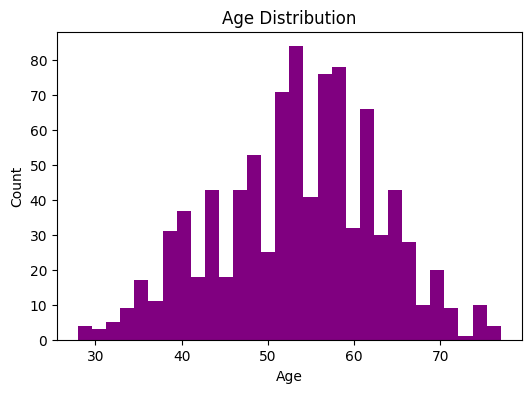

Accuracy: 0.77
Confusion Matrix:
[[  4  40]
 [  2 138]]


In [407]:
# main.py

#from data.load_data import load_data, split_data
#from analysis.exploratory_analysis import plot_target_distribution, plot_age_distribution
#from models.model import build_and_train_model, evaluate_model

# Load the heart disease dataset
data_filepath = 'data/heart_disease_uci.csv'  # Adjust the path as per your dataset location
df = load_data(data_filepath)
df = df.dropna()
df = df.drop_duplicates()

# Perform Exploratory Data Analysis (EDA)
# plot_target_distribution(df)
plot_age_distribution(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df)


# Build and train the model
model = build_and_train_model(X_train, y_train)

# Evaluate the model
evaluate_model(model, X_test, y_test)


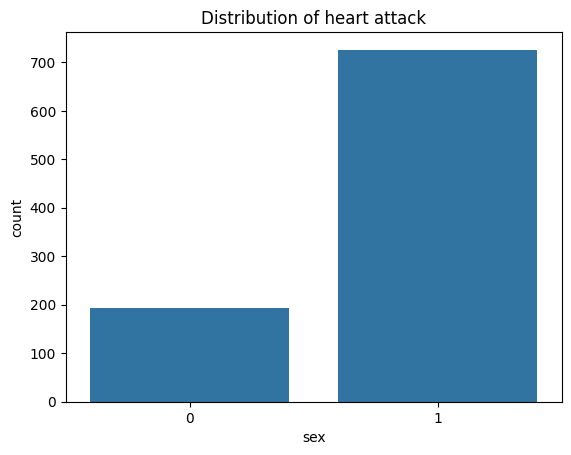

In [408]:
import seaborn as sns

sns.countplot(data=df, x="sex")
plt.title("Distribution of heart attack")
plt.show()

In [410]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder



models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}



for name, model in models.items():
    print(f"Training {name}...")
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {np.round(accuracy,2)}")
    print(classification_report(y_test, y_pred))


for name, model in models.items():
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {np.round(accuracy,2)}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.67      0.09      0.16        44
           1       0.78      0.99      0.87       140

    accuracy                           0.77       184
   macro avg       0.72      0.54      0.51       184
weighted avg       0.75      0.77      0.70       184

Training Decision Tree...
Decision Tree Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        44
           1       0.80      0.82      0.81       140

    accuracy                           0.71       184
   macro avg       0.59      0.58      0.58       184
weighted avg       0.70      0.71      0.70       184

Training Random Forest...
Random Forest Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.53      0.20      0.30        44
           1       0.79      0.94      0.86       140

    a